In [ ]:
  import cv2
  import matplotlib.pyplot as plt
  import time
  %matplotlib inline

In [ ]:
from google.colab import files

Saving OIP.jpeg to OIP (1).jpeg


In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -P drive/gaze

--2020-12-21 20:12:19--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘drive/gaze/haarcascade_frontalface_default.xml.3’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2020-12-21 20:12:19 (19.2 MB/s) - ‘drive/gaze/haarcascade_frontalface_default.xml.3’ saved [930127/930127]



In [ ]:
cascades_path = 'drive/gaze/'

In [ ]:
haar_face_cascade = cv2.CascadeClassifier(cascades_path + 'haarcascade_frontalface_default.xml')

In [ ]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2.cvtcolor is an OpenCV function which convert images to different color spaces.

In [ ]:
def detect_face(f_cascade, colored_img, scale_factor = 1.1):
  img_copy = colored_img.copy()
  gray_image = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
  faces = f_cascade.detectMultiScale(gray_image, scaleFactor = scale_factor, minNeighbors = 5)
  for(x, y, w, h) in faces:
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
  return img_copy

In [ ]:
upload = files.upload()
file1 = cv2.imread('OIP.jpeg')
face_image1 = detect_face(haar_face_cascade, file1)

Saving OIP.jpeg to OIP (5).jpeg


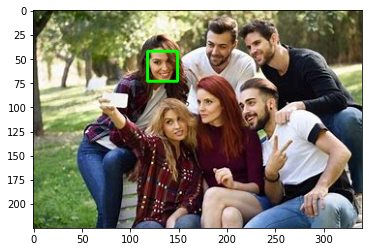

In [ ]:
plt.imshow(convertToRGB(face_image))

Saving photo2.jpeg to photo2 (5).jpeg


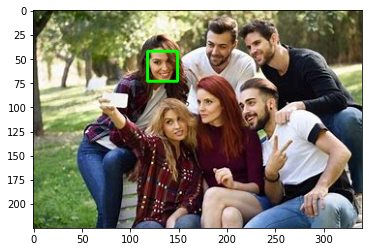

In [ ]:
upload = files.upload()
file2 = cv2.imread('photo2.jpeg')
face_image2 = detect_face(haar_face_cascade, file2, scale_factor= 1.1)
plt.imshow(convertToRGB(face_image2))

Saving photo3.jpeg to photo3 (1).jpeg


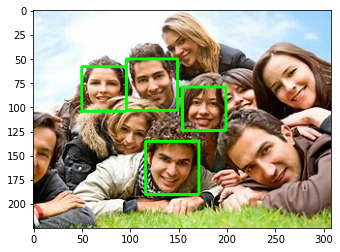

In [ ]:
upload = files.upload()
file2 = cv2.imread('photo3.jpeg')
face_image3 = detect_face(haar_face_cascade, file2, scale_factor= 1.05)
plt.imshow(convertToRGB(face_image3))

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/lbpcascades/lbpcascade_frontalface.xml -P drive/gaze

--2020-12-21 20:09:49--  https://raw.githubusercontent.com/opencv/opencv/master/data/lbpcascades/lbpcascade_frontalface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51856 (51K) [text/plain]
Saving to: ‘drive/gaze/lbpcascade_frontalface.xml.2’

lbpcascade_frontalf 100%[===================>]  50.64K  --.-KB/s    in 0.004s  

2020-12-21 20:09:50 (13.5 MB/s) - ‘drive/gaze/lbpcascade_frontalface.xml.2’ saved [51856/51856]



In [ ]:
lbp_face_cascade = cv2.CascadeClassifier(cascades_path + 'lbpcascade_frontalface.xml')

Saving photo3.jpeg to photo3 (8).jpeg


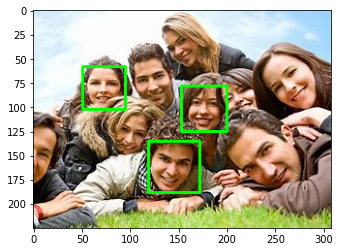

In [ ]:
upload = files.upload()
file2 = cv2.imread('photo3.jpeg')
face_image3 = detect_face(lbp_face_cascade, file2, scale_factor= 1.05)
plt.imshow(convertToRGB(face_image3))

In [ ]:
t1 = time.time()
haar_detected_img = detect_face(haar_face_cascade, file2)
t2 = time.time()
dt1 = t2 - t1

In [ ]:
t1 = time.time()
lbp_detected_img = detect_face(lbp_face_cascade, file2)
t2 = time.time()
dt2 = t2 - t1

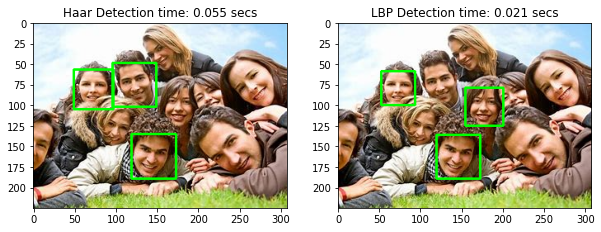

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))